<a href="https://colab.research.google.com/github/MileneBedouhene/Air-Quality-Pollution-Assessment/blob/main/AirQuality%26PollutionAssessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Air Quality and Pollution Assessment

### Load Data

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"milenehadilbedouhene","key":"c53a275509eefe1cab90eeee7ce3c91f"}'}

In [ ]:
import os
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mujtabamatin/air-quality-and-pollution-assessment

Dataset URL: https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment
License(s): apache-2.0
  0% 0.00/84.1k [00:00<?, ?B/s]
100% 84.1k/84.1k [00:00<00:00, 43.7MB/s]


In [ ]:
!unzip air-quality-and-pollution-assessment.zip -d ./data

Archive:  air-quality-and-pollution-assessment.zip
  inflating: ./data/updated_pollution_dataset.csv  


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("./data/updated_pollution_dataset.csv")

In [ ]:
data.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality,SO2_Category
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate,Low
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate,Low
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate,Medium
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good,Low
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good,Low


###Data Visualization

In [ ]:
import matplotlib.pyplot as plt

**Histogram**

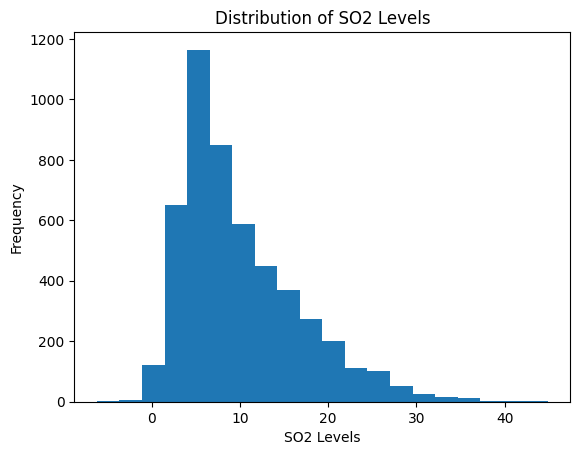

In [ ]:
plt.hist(data['SO2'], bins=20)  # Adjust the number of bins as needed
plt.xlabel('SO2 Levels')
plt.ylabel('Frequency')
plt.title('Distribution of SO2 Levels')
plt.show()

**Scatter Plot**

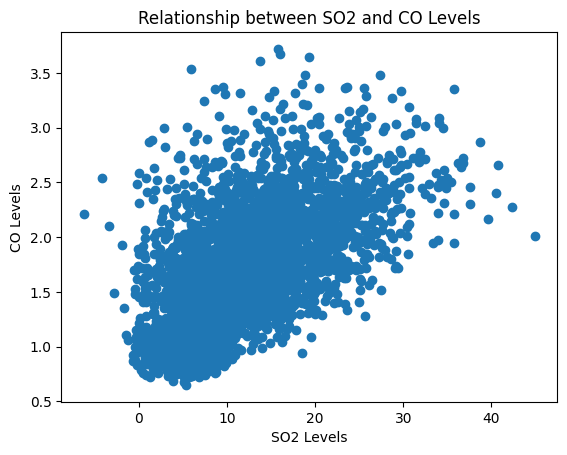

In [ ]:
plt.scatter(data['SO2'], data['CO'])
plt.xlabel('SO2 Levels')
plt.ylabel('CO Levels')
plt.title('Relationship between SO2 and CO Levels')
plt.show()

**Box Plot**

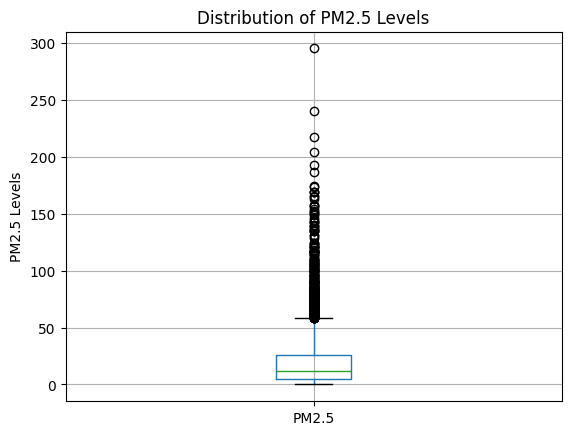

In [ ]:
data.boxplot(column='PM2.5')
plt.ylabel('PM2.5 Levels')
plt.title('Distribution of PM2.5 Levels')
plt.show()

**Bar Chart**

<ipython-input-14-db88d03a5889>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_avg_no2 = data.groupby('SO2_Category')['NO2'].mean()


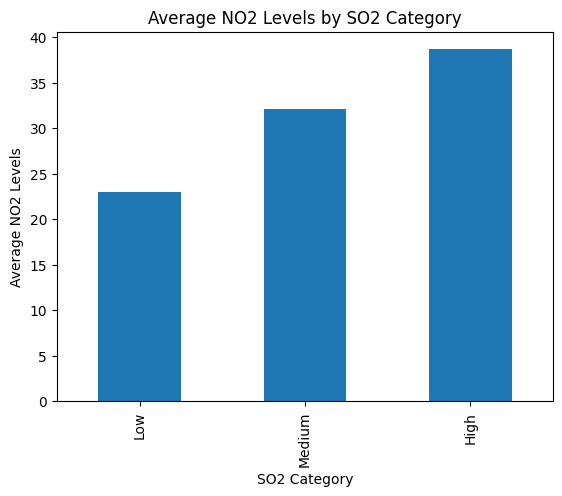

In [ ]:
data['SO2_Category'] = pd.cut(data['SO2'], bins=3, labels=['Low', 'Medium', 'High'])

category_avg_no2 = data.groupby('SO2_Category')['NO2'].mean()
category_avg_no2.plot(kind='bar')
plt.xlabel('SO2 Category')
plt.ylabel('Average NO2 Levels')
plt.title('Average NO2 Levels by SO2 Category')
plt.show()

##Data Preprocessing

In [ ]:
data.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Temperature                    5000 non-null   float64 
 1   Humidity                       5000 non-null   float64 
 2   PM2.5                          5000 non-null   float64 
 3   PM10                           5000 non-null   float64 
 4   NO2                            5000 non-null   float64 
 5   SO2                            5000 non-null   float64 
 6   CO                             5000 non-null   float64 
 7   Proximity_to_Industrial_Areas  5000 non-null   float64 
 8   Population_Density             5000 non-null   int64   
 9   Air Quality                    5000 non-null   object  
 10  SO2_Category                   5000 non-null   category
dtypes: category(1), float64(8), int64(1), object(1)
memory usage: 395.8+ KB


In [ ]:
data['SO2_Category'].unique()

['Low', 'Medium', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data["Air Quality"] = encoder.fit_transform(data["Air Quality"])
data["SO2_Category"] = encoder.fit_transform(data["SO2_Category"])
data.head()


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality,SO2_Category
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2,1
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2,1
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0,1
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0,1


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop("Air Quality", axis=1)
y = data["Air Quality"]

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (1000, 10)
X_test shape: (4000, 10)


In [ ]:
!pip install -U imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', # ou 'minority', 'not majority', 'all'
              k_neighbors=3, # essayez différentes valeurs pour k_neighbors
              random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


##Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_RandomForest = RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state= 42)
classifier_RandomForest.fit(X_train_resampled, y_train_resampled)
y_pred_RandomForest = classifier_RandomForest.predict(X_test)

##Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Confusion_matrix = confusion_matrix(y_test, y_pred_RandomForest)
print("Confusion Matrix:")
print(Confusion_matrix)

Accuracy = accuracy_score(y_test,y_pred_RandomForest)
print("Accuracy:",Accuracy)

Confusion Matrix:
[[1582    0    9    0]
 [   0  341    0   48]
 [   4    0 1175   27]
 [   0   72   61  681]]
Accuracy: 0.94475
